## 딥러닝 모델에 대한 경사하강법 적용 

* 첨자
  - i,j,l: 벡터나 행렬 데이터에서 몇 번째 성분인지 나타내는 첨자
  - m: 데이터 계열에서 몇 번째 데이터인지 나타내는 첨자
  - k: 반복 계산에서 몇 번째 계산인지 나타내는 첨자

* 변수
- M: 데이터 계열의 전체 개수
- N: 분류 클래스의 개수 
- H: 은닉층 노드의 차원수 


### 은닉층이 1개일 때의 함수 정의
$$f(x)=\frac{1}{1+e^{-x}}\quad g_i(\mathbf{u})=\frac{e^{u_i}}{\sum_{j=0}^{N-1}e^{u_j}}$$
###은닉층이 1개일 때의 예측값 계산
\begin{align}
  \mathbf{a}^{(k)(m)}&=\mathbf{V}^{(k)}\mathbf{x}^{(m)} &(11.1)\\
  b_i^{(k)(m)}&=f(a_i^{(k)(m)})&(11.2)\\
  \mathbf{u}^{(k)(m)}&=\mathbf{W}^{(k)}\mathbf{b}^{(k)(m)} &(11.3)\\
  \mathbf{yp}^{(k)(m)}&=\mathbf{g}(\mathbf{u}^{(k)(m)}) &(11.4)
\end{align}
(11.1)은 입력층 노드와 1계층 가충치 행렬의 곱, (11.2)은 가중치 행렬곱의 결과에 시그모이드 함수를 적용해서 은닉층 노드의 값으로 사용, (11.3)은 은닉층 노드와 2계층 가중치 행렬의 곱, (11.4)는 행렬곱의  결과에 소프트맥스 함수를 적용해 예측값으로 사용하는 식이다.

###은닉층이 1개일 때의 오차 계산
\begin{align}
\mathbf{yd}^{(k)(m)}&=\mathbf{yp}^{(k)(m)}-\mathbf{yt}^{(k)(m)}&(11.5)\\
bd_i^{(k)(m)}&=f'(a_i^{(k)(m)})\sum_{l=0}^{N-1}yd_l^{(k)(m)}w_{li}^{(k)}&(11.6)
\end{align}
(11.5)은 예측값 오차이며, (11.6)은 예측값 오차로 부터 은닉층의 오차를 계산하는 식이다.

###은닉층이 1개일 때의 기울기 계산
\begin{align}
  w^{(k+1)}_{ij}&=w^{(k)}_{ij}-\frac{\alpha}{M}\sum_{m=0}^{M-1}b_j^{(k)(m)}yd_{i}^{(k)(m)}&(11.7)\\
  v^{(k+1)}_{ij}&=v^{(k)}_{ij}-\frac{\alpha}{M}\sum_{m=0}^{M-1}x_j^{(m)}bd_{i}^{(k)(m)}&(11.8)
\end{align}
(11.7)은 예측값 오차에서 2계층 가중치 행렬의 기울기를 계산하는 과정이고, (11.8)은 은닉층 오차에서 1계층의 가중치 행렬의 기울기를 계산하는 식이다. \\
다음은 은닉층이 2개인 경우이다. 변수가 많아서 혼동스럽지만 은닉층이 1개일 때와 크게 다르지 않으므로 그림을 기억하면서 확인 해 보길 추천한다.

### 은닉층이 2개일 때의 예측값 계산
\begin{align}
  \mathbf{a}^{(k)(m)}&=\mathbf{U}^{(k)}\mathbf{x}^{(m)}&(11.9)\\
  b_i^{(k)(m)}&=f(a_i^{(k)(m)})&(11.10)\\
\mathbf{c}^{(k)(m)}&=\mathbf{V}^{(k)}\mathbf{b}^{(m)} &(11.11)\\
  d_i^{(k)(m)}&=f(c_i^{(k)(m)})&(11.12)\\
  \mathbf{u}^{(k)(m)}&=\mathbf{W}^{(k)}\mathbf{d}^{(k)(m)}&(11.13)\\
  \mathbf{yp}^{(k)(m)}&=\mathbf{g}(\mathbf{u}^{(k)(m)})&(11.14)
\end{align}

### 은닉층이 2개일 때의 오차 계산
\begin{align}
\mathbf{yd}^{(k)(m)}&=\mathbf{yp}^{(k)(m)}-\mathbf{yt}^{(k)(m)}&(11.15)\\
bb_i^{(k)(m)}&=f'(c_i^{(k)(m)})\sum_{l=0}^{N-1}yd_l^{(k)(m)}w_{li}^{(k)}&(11.16)\\
bd_i^{(k)(m)}&=f'(a_i^{(k)(m)})\sum_{l=0}^{H}dd_l^{(k)(m)}v_{li}^{(k)}&(11.17)
\end{align}
###은닉층이 2개일 때의 기울기 계산
\begin{align}
  w^{(k+1)}_{ij}&=w^{(k)}_{ij}-\frac{\alpha}{M}\sum_{m=0}^{M-1}d_j^{(k)(m)}yd_{i}^{(k)(m)}&(11.18)\\
 v^{(k+1)}_{ij}&=v^{(k)}_{ij}-\frac{\alpha}{M}\sum_{m=0}^{M-1}b_j^{(m)}dd_{i}^{(k)(m)}&(11.19)\\
   u^{(k+1)}_{ij}&=u^{(k)}_{ij}-\frac{\alpha}{M}\sum_{m=0}^{M-1}x_j^{(m)}bd_{i}^{(k)(m)}&(11.20)
\end{align}

In [1]:
# 필요 라이브러리 선언

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 데이터 준비

In [2]:
train = pd.read_csv("mnist_small_train.csv")

In [3]:
test = pd.read_csv("mnist_small_test.csv")

In [4]:
train

,Unnamed: 0,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,8767,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7432,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4780,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6956,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,624,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,6026,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5996,412,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,7428,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5998,7821,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test

,Unnamed: 0,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,8567,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5220,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6416,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8741,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8857,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,8519,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,3994,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,7773,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train=train.to_numpy()
test=test.to_numpy()

In [7]:
train

array([[8767,    7,    0, ...,    0,    0,    0],
       [7432,    7,    0, ...,    0,    0,    0],
       [4780,    0,    0, ...,    0,    0,    0],
       ...,
       [7428,    8,    0, ...,    0,    0,    0],
       [7821,    3,    0, ...,    0,    0,    0],
       [3022,    5,    0, ...,    0,    0,    0]], dtype=int64)

In [8]:
test

array([[8567,    0,    0, ...,    0,    0,    0],
       [5220,    9,    0, ...,    0,    0,    0],
       [ 126,    0,    0, ...,    0,    0,    0],
       ...,
       [3994,    5,    0, ...,    0,    0,    0],
       [7773,    2,    0, ...,    0,    0,    0],
       [5550,    1,    0, ...,    0,    0,    0]], dtype=int64)

In [9]:
print(train.shape,test.shape)

(6000, 786) (1000, 786)


In [10]:
x_org, y_org= train[:,2:],train[:,[1]]
x_test, y_test= test[:,2:],test[:,[1]]

In [11]:
x_org

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
y_org

array([[7],
       [7],
       [0],
       ...,
       [8],
       [3],
       [5]], dtype=int64)

In [13]:
print(x_org.shape,y_org.shape)
print(x_test.shape,y_test.shape)

(6000, 784) (6000, 1)
(1000, 784) (1000, 1)


In [14]:
# 입력 데이터의 가공

# step1 데이터 정규화 값의 범위를 [0, 1]로 제한(검은색 : 0, 흰색 : 255, 회색 : 1~254)
x_norm = x_org / 255.0
x_norm_test = x_test / 255.0

In [15]:
x_norm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
x_norm_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
# 앞에 더미 데이터 변수(1)를 추가
x_all = np.insert(x_norm, 0, 1, axis=1)
x_all_test = np.insert(x_norm_test, 0, 1, axis=1)
print('더미 변수 추가 후', x_all.shape)
print('더미 변수 추가 후', x_all_test.shape)

더미 변수 추가 후 (6000, 785)
더미 변수 추가 후 (1000, 785)


In [18]:
# step 2 y를 One-hot-Vector로
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
y_all_one = ohe.fit_transform(y_org)
y_all_one_test = ohe.fit_transform(y_test)
print('원핫 인코딩', y_all_one.shape)
print('원핫 인코딩', y_all_one_test.shape)

원핫 인코딩 (6000, 10)
원핫 인코딩 (1000, 10)


In [19]:
# step 3 학습 데이터와 검증 데이터로 분할
x_train=x_all
x_test=x_all_test
y_train=y_org
#y_test=y=test
y_train_one=y_all_one
y_test_one=y_all_one_test

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape, 
    y_train_one.shape, y_test_one.shape)

(6000, 785) (1000, 785) (6000, 1) (1000, 1) (6000, 10) (1000, 10)


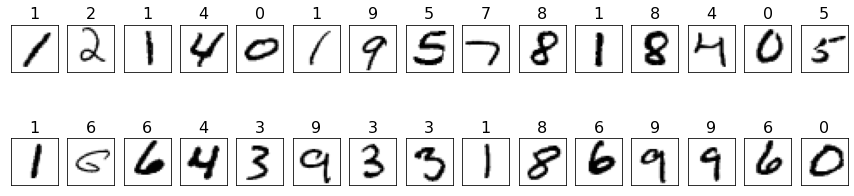

In [20]:
# 데이터 내용 확인
N = 30
np.random.seed(55)
indexes = np.random.choice(y_test.shape[0], N, replace=False)
x_selected = x_test[indexes,1:]
y_selected = y_test[indexes]
plt.figure(figsize=(15, 8))
for i in range(N):
    ax = plt.subplot(4, N/2, i + 1)
    plt.imshow(x_selected[i].reshape(28, 28),cmap='gray_r')
    ax.set_title('%d' %y_selected[i], fontsize=16)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## 예측함수

In [21]:
# 시그모이드 함수
def sigmoid(x):
    return 1/(1+ np.exp(-x))

# 소프트맥스 함수
def softmax(x):
    x = x.T
    x_max = x.max(axis=0)
    x = x - x_max
    w = np.exp(x)
    return (w / w.sum(axis=0)).T

검증함수

In [22]:
# 교차 엔트로피 함수
def cross_entropy(yt, yp):
    return -np.mean(np.sum(yt * np.log(yp), axis=1))

# 검증 처리(리턴 값은 정확도와 손실함수)
from sklearn.metrics import accuracy_score

def evaluate(x_test, y_test, y_test_one, V, W):
    b1_test = np.insert(sigmoid(x_test @ V), 0, 1, axis=1)
    yp_test_one = softmax(b1_test @ W)
    yp_test = np.argmax(yp_test_one, axis=1)
    loss = cross_entropy(y_test_one, yp_test_one)
    score = accuracy_score(y_test, yp_test)
    return score, loss   

## 미니 배치 처리 
여러 입력 데이터의 묶음을 '배치'라고 부른다 했다.
미니 배치 또한 배치의 일종인데, 학습용 데이터셋에서 특정 개수로 이뤄진 배치를 랜덤으로 뽑은 것을 '미니 배치'라고 부른다. 예컨대, 6000개의 학습용 데이터셋에서 데이터를 10개씩 랜덤으로 뽑아 신경망에 학습시키는 과정을 반복하는 것을 '미니 배치 학습'이라고 하는 식이다.

미니 배치 학습을 사용하는 이유
지금까지 각 데이터에 대한 손실 함수만 생각해왔다. 이제는 훈련 데이터 전체에 대한 손실 함수의 합을 구하는 방법을 생각해보자. 예를 들어, Cross-Entropy Error를 이용해 훈련 데이터 전체에 대한 손실 함수의 합은 손실 함수를 단순히 n개의 데이터로 확장하고, 마지막에 n으로 합을 나누어 모든 데이터에 대한 평균적인 손실 함수를 구하고 있을 뿐이다. 이렇게 평균을 구해 사용하면 훈련 데이터 개수와 상관 없이 언제든 통일된 지표를 얻을 수 있다. 훈련 데이터가 10개든, 100개든, 1000개든 상관이 없다.

그런데, MNIST 데이터셋의 훈련용 데이터는 6천(실제는 6만개) 개였다. 때문에 모든 데이터의 평균 손실 함수를 구하는 데 시간이 좀 걸린다. 혹여나 빅데이터를 이용하는 모델이라면 수만~수천만, 혹은 그 이상의 데이터의 평균 손실 함수를 구해야 하는데... 이 엄청나게 많은 데이터를 대상으로 일일이 손실 함수를 계산하는 건 (가능하긴 하겠지만) 현실적이지 않다.
그래서 데이터의 일부만을 추출해 구한 평균 손실 함숫값을 전체 데이터에 대한 평균 손실 함숫값의 근사값으로 이용하곤 한다.
신경망의 학습에서도 훈련 데이터로부터 일부만 추출해 학습을 수행한다. 이 '일부'를 미니 배치라 하는 것이다.

In [23]:
# 미니 배치용 인덱스 취득 함수
import numpy as np

class Indexes():
    # 생성자
    def __init__(self, total, size):
        # 배열 전체의 크기
        self.total = total
        # 배치 크기
        self.size = size
        # 작업용 인덱스 초기값은 NULL로 한다.
        self.indexes = np.zeros(0)
    # 인덱스 취득 함수   
    def next_index(self):
        next_flag = False
    # 배치 크기보다 작업용 인덱스가 작은 경우 인덱스를 재생성
        if len(self.indexes) < self.size: 
            self.indexes = np.random.choice(self.total, 
                self.total, replace=False)
            next_flag = True
        # 복귀용 인덱스 취득과 작업용 인덱스 갱신
        index = self.indexes[:self.size]
        self.indexes = self.indexes[self.size:]
        return index, next_flag

In [24]:
# 인덱스 클래스의 테스트
# 클래스 초기화
# 20: 전체 배열의 크기
# 5: 한번에 가져오는 인덱스 수
indexes = Indexes(20, 5)

for i in range(6):
    # next_index 함수 호출
    # 리턴 값1: 인덱스의 numpy 배열
    # 리턴 값2: 작업용 인덱스가 갱신되었는지의 여부
    arr, flag = indexes.next_index()
    print(arr, flag)

[17  7  3 19  2] True
[ 4 18  6  9  1] False
[15  8 13 10 12] False
[ 0 14 11 16  5] False
[12 16  2  8 18] True
[14  1  9  3 17] False


## 초기화 처리 1

In [25]:
# 변수 초기 선언 

# 은닉층의 노드 개수
H = 128
H1 = H + 1
# M: 학습용 데이터 계열의 전체 개수
M  = x_train.shape[0]
# D: 입력 데이터의 차원 수
D = x_train.shape[1]
# N: 분류 클래스의 개수
N = y_train_one.shape[1]

# 반복 횟수
nb_epoch = 100  #epoch:미니배치 학습에서 반복 횟수를 세는 단위
# 미니 배치 크기
batch_size = 1024
B = batch_size
# 학습률
alpha = 0.02

# 가중치 행렬의 초기 설정(모든 값이 1)
V = np.ones((D, H))
W = np.ones((H1, N))

# 검증 결과 기록(손실함수와 정확도)
history1 = np.zeros((0, 3))

# 미니 배치를 위한 초기화
indexes = Indexes(M, batch_size)

# 반복 횟수 카운터 초기화
epoch = 0

## 주요 처리 1

In [26]:
# 주요 처리
while epoch < nb_epoch:
    # 학습대상 선택(미니 배치 학습법)
    index, next_flag = indexes.next_index()
    x, yt = x_train[index], y_train_one[index] 
    # 예측값 계산(순전파)
    a = x @ V                         # (11.1)
    b = sigmoid(a)                    # (11.2)
    b1 = np.insert(b, 0, 1, axis=1)   # 더미 변수의 추가 
    u = b1 @ W                        # (11.3)   
    yp = softmax(u)                   # (11.4)  
    # 오차 계산
    yd = yp - yt                      # (11.5)
    bd = b * (1-b) * (yd @ W[1:].T)   # (11.6)
    # 기울기 계산
    W = W - alpha * (b1.T @ yd) / B   # (11.7)
    V = V - alpha * (x.T @ bd) / B    # (11.8)
    # 로그 기록
    if next_flag: # 1 epoch 종료 후의 처리
        score, loss = evaluate(
            x_test, y_test, y_test_one, V, W)
        history1 = np.vstack((history1, 
            np.array([epoch, loss, score])))
        print("epoch = %d loss = %f score = %f" 
            % (epoch, loss, score))
        epoch = epoch + 1

epoch = 0 loss = 2.302891 score = 0.112000
epoch = 1 loss = 2.302719 score = 0.112000
epoch = 2 loss = 2.303380 score = 0.107000
epoch = 3 loss = 2.303092 score = 0.112000
epoch = 4 loss = 2.303637 score = 0.112000
epoch = 5 loss = 2.304720 score = 0.112000
epoch = 6 loss = 2.302121 score = 0.112000
epoch = 7 loss = 2.302642 score = 0.112000
epoch = 8 loss = 2.302702 score = 0.112000
epoch = 9 loss = 2.303719 score = 0.112000
epoch = 10 loss = 2.303452 score = 0.112000
epoch = 11 loss = 2.301583 score = 0.112000
epoch = 12 loss = 2.301955 score = 0.112000
epoch = 13 loss = 2.304701 score = 0.112000
epoch = 14 loss = 2.302078 score = 0.112000
epoch = 15 loss = 2.301082 score = 0.107000
epoch = 16 loss = 2.302177 score = 0.112000
epoch = 17 loss = 2.304096 score = 0.099000
epoch = 18 loss = 2.302736 score = 0.112000
epoch = 19 loss = 2.304209 score = 0.099000
epoch = 20 loss = 2.304672 score = 0.099000
epoch = 21 loss = 2.303729 score = 0.112000
epoch = 22 loss = 2.302794 score = 0.11200

## 결과 확인 1

In [27]:
#손실함수와 정확도의 확인
print('[초기 상태] 손실함수: %f, 정확도: %f'
        % (history1[0,1], history1[0,2]))
print('[최종 상태] 손실함수: %f, 정확도: %f'
        % (history1[-1,1], history1[-1,2]))

[초기 상태] 손실함수: 2.302891, 정확도: 0.112000
[최종 상태] 손실함수: 2.303913, 정확도: 0.088000


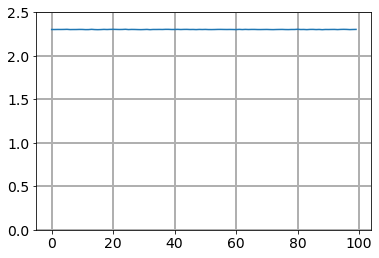

In [28]:
# 학습 곡선 표시(손실함수의 값)
plt.plot(history1[:,0], history1[:,1])
plt.ylim(0,2.5)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.show()

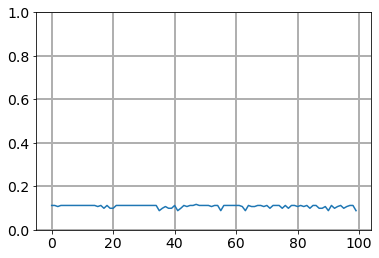

In [29]:
# 학습 곡선 표시(정확도)
plt.plot(history1[:,0], history1[:,2])
plt.ylim(0,1)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.show()

## 매개변수 초기값의 설정 변경

입력 데이터의 차원 수가 클 때 경사하강법을 적용하는 경우 가중치 행렬의 초기값이 매우 중요하다. 여러가지 초기화 방법이 있으나 우리는 He normal(ReLU 함수 사용시 적합함)이라는 이름으로 알려진 초기화 방법을 사용하겠다. 이방법은 
* 가중치 행렬의 성분 값에는 평균이 0, 분산이 1인 정규분포난수를 특정값으로 나눈 값을 사용한다.
* 입력 데이터의 차원 수를 N이라고 할 때 특정값은 $\displaystyle \sqrt{\frac{N}{2}}$ 이다.
---

## 초기화 처리2

In [30]:
# 변수 초기 선언 가중치 행렬의 초기화 방식 변경

# 은닉층의 노드 개수
H = 128
H1 = H + 1

# M: 학습용 데이터 계열의 전체 개수
M  = x_train.shape[0]

# D: 입력 데이터의 차원 수
D = x_train.shape[1]

# N: 분류 클래스의 개수
N = y_train_one.shape[1]

# 기계 학습 매개변수
alpha = 0.02
nb_epoch = 200
batch_size = 768
B = batch_size

# 가중치 행렬의 초기 설정(모든 값이 1)
V = np.ones((D, H))
W = np.ones((H1, N))

# 검증 결과 기록(손실함수와 정확도)
history2 = np.zeros((0, 3))

# 미니 배치를 위한 초기화
indexes = Indexes(M, batch_size)

# 반복 횟수 카운터 초기화
epoch = 0

In [31]:
# 개선된 가중치 행렬의 초기화
V = np.random.randn(D, H) / np.sqrt(D / 2)
W = np.random.randn(H1, N) / np.sqrt(H1 / 2)
print(V[:2,:5])
print(W[:2,:5])

[[-0.03968503 -0.01774705 -0.02460209 -0.01564903 -0.02449692]
 [-0.03140431 -0.02529811  0.02782618 -0.01596233 -0.01649787]]
[[ 0.0862755  -0.40118017  0.21489847 -0.18490421  0.05998931]
 [-0.0620789   0.07994427  0.07848213 -0.02380033  0.11920622]]


## 주요 처리 2

In [32]:
# 주요 처리
while epoch < nb_epoch:
    # 학습대상 선택(미니 배치 학습법)
    index, next_flag = indexes.next_index()
    x, yt = x_train[index], y_train_one[index]
    # 예측값 계산(순전파)
    a = x @ V                         # (11.1)
    b = sigmoid(a)                    # (11.2)
    b1 = np.insert(b, 0, 1, axis=1)   # 더미 변수의 추가
    u = b1 @ W                        # (11.3)
    yp = softmax(u)                   # (11.4)
    # 오차 계산
    yd = yp - yt                      # (11.5)
    bd = b * (1-b) * (yd @ W[1:].T)   # (11.6)
    # 기울기 계산
    W = W - alpha * (b1.T @ yd) / B   # (11.7)
    V = V - alpha * (x.T @ bd) / B    # (11.8)

    if next_flag: # 1epoch 종료 후의 처리
        score, loss = evaluate(
            x_test, y_test, y_test_one, V, W)
        history2 = np.vstack((history2, 
            np.array([epoch, loss, score])))
        print("epoch = %d loss = %f score = %f" 
            % (epoch, loss, score))
        epoch = epoch + 1

epoch = 0 loss = 2.527982 score = 0.088000
epoch = 1 loss = 2.356116 score = 0.097000
epoch = 2 loss = 2.296175 score = 0.118000
epoch = 3 loss = 2.263973 score = 0.152000
epoch = 4 loss = 2.240492 score = 0.191000
epoch = 5 loss = 2.219352 score = 0.249000
epoch = 6 loss = 2.199017 score = 0.300000
epoch = 7 loss = 2.179001 score = 0.366000
epoch = 8 loss = 2.159367 score = 0.414000
epoch = 9 loss = 2.140706 score = 0.453000
epoch = 10 loss = 2.121467 score = 0.492000
epoch = 11 loss = 2.102168 score = 0.520000
epoch = 12 loss = 2.083465 score = 0.546000
epoch = 13 loss = 2.065117 score = 0.564000
epoch = 14 loss = 2.046176 score = 0.570000
epoch = 15 loss = 2.028164 score = 0.584000
epoch = 16 loss = 2.010341 score = 0.597000
epoch = 17 loss = 1.992713 score = 0.616000
epoch = 18 loss = 1.974784 score = 0.614000
epoch = 19 loss = 1.957230 score = 0.633000
epoch = 20 loss = 1.939640 score = 0.644000
epoch = 21 loss = 1.922563 score = 0.668000
epoch = 22 loss = 1.904945 score = 0.66700

epoch = 186 loss = 0.694849 score = 0.836000
epoch = 187 loss = 0.692720 score = 0.836000
epoch = 188 loss = 0.690405 score = 0.835000
epoch = 189 loss = 0.688327 score = 0.835000
epoch = 190 loss = 0.686228 score = 0.837000
epoch = 191 loss = 0.684139 score = 0.837000
epoch = 192 loss = 0.682377 score = 0.837000
epoch = 193 loss = 0.680272 score = 0.837000
epoch = 194 loss = 0.678115 score = 0.837000
epoch = 195 loss = 0.676111 score = 0.838000
epoch = 196 loss = 0.674292 score = 0.837000
epoch = 197 loss = 0.672142 score = 0.837000
epoch = 198 loss = 0.670314 score = 0.838000
epoch = 199 loss = 0.668209 score = 0.841000


## 결과 확인 2

In [33]:
# 손실함수와 정확도의 확인
print('[초기 상태] 손실함수: %f, 정확도: %f'
        % (history2[0,1], history2[0,2]))
print('[최종 상태] 손실함수: %f, 정확도: %f'
        % (history2[-1,1], history2[-1,2]))

[초기 상태] 손실함수: 2.527982, 정확도: 0.088000
[최종 상태] 손실함수: 0.668209, 정확도: 0.841000


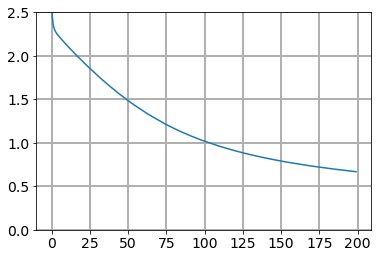

In [34]:
# 학습 곡선 표시(손실함수의 값)
plt.plot(history2[:,0], history2[:,1])
plt.ylim(0,2.5)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.show()

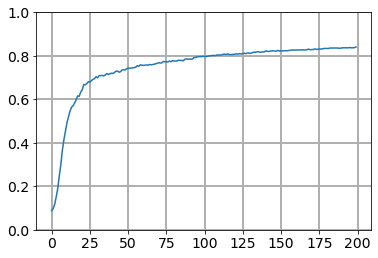

In [35]:
# 학습 곡선 표시(정확도)
plt.plot(history2[:,0], history2[:,2])
plt.ylim(0,1)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.show()

## ReLU 함수의 도입

In [36]:
# ReLU 함수
def ReLU(x):
    return np.maximum(0, x)

In [37]:
# 계단함수 (ReLU 미분)
def step(x):
    return 1.0 * ( x > 0)

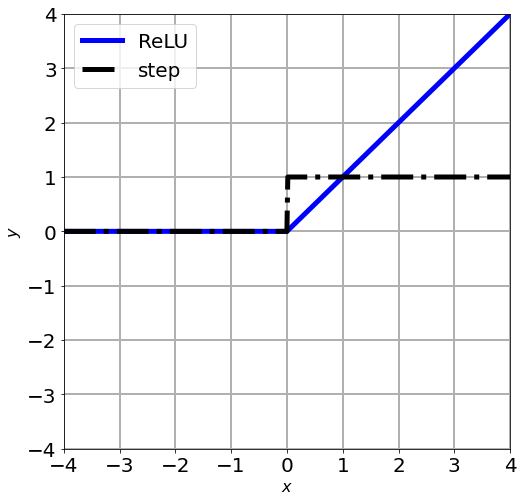

In [38]:
# ReLU 함수와 계단함수의 그래프 표시
xx =  np.linspace(-4, 4, 501)
yy = ReLU(xx)
plt.figure(figsize=(8,8))
#plt.ylim(0.0, 1.0)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel(r'$x$', fontsize=16)
plt.ylabel(r'$y$', fontsize=16)
plt.grid(lw=2)
plt.plot(xx, ReLU(xx), c='b', label='ReLU', linestyle='-', lw=5)
plt.plot(xx, step(xx), c='k', label='step', linestyle='-.', lw=5)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20)
plt.show()

## 검증 처리 3

In [39]:
# 검증 처리 (ReLU 함수 지원)
from sklearn.metrics import accuracy_score

def evaluate2(x_test, y_test, y_test_one, V, W):
    b1_test = np.insert(ReLU(x_test @ V), 0, 1, axis=1)
    yp_test_one = softmax(b1_test @ W)
    yp_test = np.argmax(yp_test_one, axis=1)
    loss = cross_entropy(y_test_one, yp_test_one)
    score = accuracy_score(y_test, yp_test)
    return score, loss   

## 초기화 처리 3

In [40]:
# 변수 초기 선언 가중치 행렬의 초기화 방식 변경
# 은닉층의 노드 개수
H = 128
H1 = H + 1
# M: 학습용 데이터 계열의 전체 개수
M  = x_train.shape[0]

# D: 입력 데이터의 차원 수
D = x_train.shape[1]

# N: 분류 클래스의 개수
N = y_train_one.shape[1]

# 기계 학습 매개변수
alpha = 0.02
nb_epoch = 200
batch_size = 768
B = batch_size

# 가중치 행렬의 초기 설정
V = np.random.randn(D, H) / np.sqrt(D / 2)
W = np.random.randn(H1, N) / np.sqrt(H1 / 2)

# 검증 결과 기록(손실함수와 정확도)
history3 = np.zeros((0, 3))

# 미니 배치를 위한 초기화
indexes = Indexes(M, batch_size)

# 반복 횟수 카운터 초기화
epoch = 0

## 주요 처리 3

In [41]:
# 주요 처리 (시그모이드 함수를 ReLU 함수로 변경)
while epoch < nb_epoch:
    # 학습대상 선택(미니 배치 학습법)
    index, next_flag = indexes.next_index()
    x, yt = x_train[index], y_train_one[index]
    # 예측값 계산(순전파)
    a = x @ V                         # (11.1)
    b = ReLU(a)                       # (11.2) ReLU 함수로 교체
    b1 = np.insert(b, 0, 1, axis=1)   # 더미 변수의 추가 
    u = b1 @ W                        # (11.3)   
    yp = softmax(u)                   # (11.4)
    # 오차 계산
    yd = yp - yt                      # (11.5)
    bd = step(a) * (yd @ W[1:].T)     #(11.6) 계단함수로 교체
    # 기울기 계산
    W = W - alpha * (b1.T @ yd) / B   # (11.7)
    V = V - alpha * (x.T @ bd) / B    # (11.8)

    if next_flag: # 1epoch 종료 후의 처리
        score, loss = evaluate2(
            x_test, y_test, y_test_one, V, W)
        history3 = np.vstack((history3, 
            np.array([epoch, loss, score])))
        print("epoch = %d loss = %f score = %f" 
            % (epoch, loss, score))
        epoch = epoch + 1

epoch = 0 loss = 2.434272 score = 0.091000
epoch = 1 loss = 2.226809 score = 0.179000
epoch = 2 loss = 2.082159 score = 0.319000
epoch = 3 loss = 1.958296 score = 0.451000
epoch = 4 loss = 1.846008 score = 0.542000
epoch = 5 loss = 1.739220 score = 0.608000
epoch = 6 loss = 1.639477 score = 0.642000
epoch = 7 loss = 1.546258 score = 0.666000
epoch = 8 loss = 1.457049 score = 0.691000
epoch = 9 loss = 1.376493 score = 0.714000
epoch = 10 loss = 1.302361 score = 0.726000
epoch = 11 loss = 1.234967 score = 0.740000
epoch = 12 loss = 1.174439 score = 0.750000
epoch = 13 loss = 1.119542 score = 0.761000
epoch = 14 loss = 1.070689 score = 0.770000
epoch = 15 loss = 1.026472 score = 0.773000
epoch = 16 loss = 0.985628 score = 0.787000
epoch = 17 loss = 0.948399 score = 0.790000
epoch = 18 loss = 0.915793 score = 0.793000
epoch = 19 loss = 0.885669 score = 0.798000
epoch = 20 loss = 0.857731 score = 0.801000
epoch = 21 loss = 0.833306 score = 0.805000
epoch = 22 loss = 0.809228 score = 0.80800

epoch = 185 loss = 0.340859 score = 0.905000
epoch = 186 loss = 0.340724 score = 0.905000
epoch = 187 loss = 0.340295 score = 0.905000
epoch = 188 loss = 0.339364 score = 0.908000
epoch = 189 loss = 0.339174 score = 0.906000
epoch = 190 loss = 0.338857 score = 0.906000
epoch = 191 loss = 0.338080 score = 0.907000
epoch = 192 loss = 0.337850 score = 0.905000
epoch = 193 loss = 0.337347 score = 0.906000
epoch = 194 loss = 0.337070 score = 0.905000
epoch = 195 loss = 0.336674 score = 0.905000
epoch = 196 loss = 0.336199 score = 0.906000
epoch = 197 loss = 0.336008 score = 0.905000
epoch = 198 loss = 0.335340 score = 0.908000
epoch = 199 loss = 0.335030 score = 0.906000


## 결과 확인 3

In [42]:
# 손실함수와 정확도의 확인
print('[초기 상태] 손실함수: %f, 정확도: %f'
        % (history3[0,1], history3[0,2]))
print('[최종 상태] 손실함수: %f, 정확도: %f'
        % (history3[-1,1], history3[-1,2]))

[초기 상태] 손실함수: 2.434272, 정확도: 0.091000
[최종 상태] 손실함수: 0.335030, 정확도: 0.906000


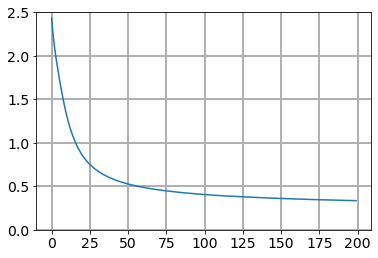

In [43]:
# 학습 곡선 표시(손실함수의 값)
plt.plot(history3[:,0], history3[:,1])
plt.ylim(0,2.5)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.show()

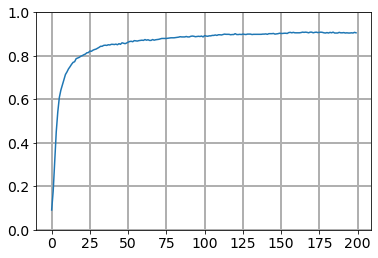

In [44]:
# 학습 곡선 표시(정확도)
plt.plot(history3[:,0], history3[:,2])
plt.ylim(0,1)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.show()

In [45]:
# 데이터 내용 확인
import matplotlib.pyplot as plt
N = 30
np.random.seed(123)
indexes = np.random.choice(y_test.shape[0], N, replace=False)

In [46]:
# x_org의 선택 결과 표시(흑백 반전)
x_selected = x_test[indexes]
y_selected = y_test[indexes]

In [47]:
# 예측값 계산
b1_test = np.insert(ReLU(x_selected @ V), 0, 1, axis=1)
yp_test_one = softmax(b1_test @ W)
yp_test = np.argmax(yp_test_one, axis=1)

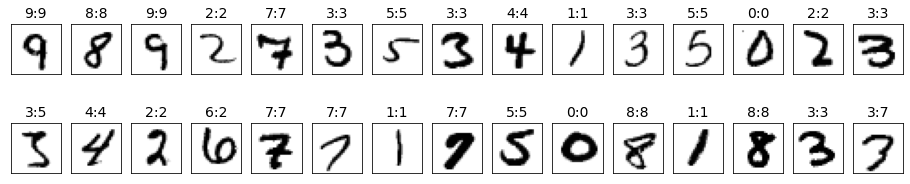

In [48]:
# 그래프 표시
plt.figure(figsize=(16, 7))
for i in range(N):
    ax = plt.subplot(4, N/2, i + 1)
    plt.imshow(x_selected[i,1:].reshape(28, 28),cmap='gray_r')
    ax.set_title('%d:%d' % (y_selected[i], yp_test[i]),fontsize=14 )
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 은닉층 2계화

In [49]:
# 검증 처리 (은닉층에 2계층 지원)
from sklearn.metrics import accuracy_score

def evaluate3(x_test, y_test, y_test_one, U, V, W):
    b1_test = np.insert(ReLU(x_test @ U), 0, 1, axis=1)
    d1_test = np.insert(ReLU(b1_test @ V), 0, 1, axis=1)
    yp_test_one = softmax(d1_test @ W)
    yp_test = np.argmax(yp_test_one, axis=1)
    loss = cross_entropy(y_test_one, yp_test_one)
    score = accuracy_score(y_test, yp_test)
    return score, loss   

In [50]:
# 변수 초기 선언 가중치 행렬의 초기화 방식 변경
# 은닉층의 노드 개수
H = 128
H1 = H + 1
# M: 학습용 데이터 계열의 전체 개수
M  = x_train.shape[0]

# D: 입력 데이터의 차원 수
D = x_train.shape[1]

# N: 분류 클래스의 개수
N = y_train_one.shape[1]

# 기계 학습 매개변수
alpha = 0.02
nb_epoch = 200
batch_size = 768
B = batch_size

# 가중치 행렬의 초기 설정
U = np.random.randn(D, H) / np.sqrt(D / 2)
V = np.random.randn(H1, H) / np.sqrt(H1 / 2)
W = np.random.randn(H1, N) / np.sqrt(H1 / 2)

# 검증 결과 기록(손실함수와 정확도)
history4 = np.zeros((0, 3))

# 미니 배치를 위한 초기화
indexes = Indexes(M, batch_size)

# 반복 횟수 카운터 초기화
epoch = 0

In [51]:
# 주요 처리 (은닉층 2계층화)

while epoch < nb_epoch:
    # 학습대상 선택(미니 배치 학습법)
    index, next_flag = indexes.next_index()
    x, yt = x_train[index], y_train_one[index]
    # 예측값 계산(순전파)
    a = x @ U                        # (11.9)
    b = ReLU(a)                      # (11.10)
    b1 = np.insert(b, 0, 1, axis=1)  # 더미 변수의 추가
    c = b1 @ V                       # (11.11)
    d = ReLU(c)                      # (11.12)
    d1 = np.insert(d, 0, 1, axis=1)  # 더미 변수의 추가
    u = d1 @ W                       # (11.13)
    yp = softmax(u)                  # (11.14)
    # 오차 계산
    yd = yp - yt                     # (11.15)
    dd = step(c) * (yd @ W[1:].T)    # (11.16)
    bd = step(a) * (dd @ V[1:].T)    # (11.17)
    # 기울기 계산
    W = W - alpha * (d1.T @ yd) / B  # (11.18)
    V = V - alpha * (b1.T @ dd) / B  # (11.19)
    U = U - alpha * (x.T @ bd) / B   # (11.20)

    if next_flag: # 1epoch 종료 후의 처리
        score, loss = evaluate3(
            x_test, y_test, y_test_one, U, V, W)
        history4 = np.vstack((history4, 
            np.array([epoch, loss, score])))
        print("epoch = %d loss = %f score = %f" 
            % (epoch, loss, score))
        epoch = epoch + 1

epoch = 0 loss = 2.420991 score = 0.102000
epoch = 1 loss = 2.229501 score = 0.175000
epoch = 2 loss = 2.104537 score = 0.307000
epoch = 3 loss = 1.996555 score = 0.423000
epoch = 4 loss = 1.892685 score = 0.511000
epoch = 5 loss = 1.787321 score = 0.576000
epoch = 6 loss = 1.681956 score = 0.647000
epoch = 7 loss = 1.575295 score = 0.685000
epoch = 8 loss = 1.473041 score = 0.712000
epoch = 9 loss = 1.376224 score = 0.733000
epoch = 10 loss = 1.285114 score = 0.751000
epoch = 11 loss = 1.201768 score = 0.759000
epoch = 12 loss = 1.127925 score = 0.760000
epoch = 13 loss = 1.059479 score = 0.770000
epoch = 14 loss = 1.000692 score = 0.776000
epoch = 15 loss = 0.947835 score = 0.778000
epoch = 16 loss = 0.900859 score = 0.786000
epoch = 17 loss = 0.858935 score = 0.794000
epoch = 18 loss = 0.823272 score = 0.800000
epoch = 19 loss = 0.790092 score = 0.804000
epoch = 20 loss = 0.760355 score = 0.810000
epoch = 21 loss = 0.735025 score = 0.813000
epoch = 22 loss = 0.710640 score = 0.82300

epoch = 185 loss = 0.291835 score = 0.918000
epoch = 186 loss = 0.292524 score = 0.914000
epoch = 187 loss = 0.292365 score = 0.911000
epoch = 188 loss = 0.291472 score = 0.913000
epoch = 189 loss = 0.291188 score = 0.912000
epoch = 190 loss = 0.291324 score = 0.914000
epoch = 191 loss = 0.290125 score = 0.912000
epoch = 192 loss = 0.290584 score = 0.912000
epoch = 193 loss = 0.289120 score = 0.915000
epoch = 194 loss = 0.289967 score = 0.914000
epoch = 195 loss = 0.288938 score = 0.916000
epoch = 196 loss = 0.288470 score = 0.915000
epoch = 197 loss = 0.288698 score = 0.914000
epoch = 198 loss = 0.287737 score = 0.917000
epoch = 199 loss = 0.287499 score = 0.915000


In [52]:
# 손실함수와 정확도의 확인
print('[초기 상태] 손실함수: %f, 정확도: %f'
    % (history4[1,1], history4[1,2]))
print('[최종 상태] 손실함수: %f, 정확도: %f'
    % (history4[-1,1], history4[-1,2]))

[초기 상태] 손실함수: 2.229501, 정확도: 0.175000
[최종 상태] 손실함수: 0.287499, 정확도: 0.915000


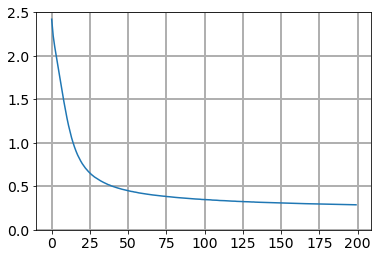

In [53]:
# 학습 곡선 표시(손실함수의 값)
plt.plot(history4[:,0], history4[:,1])
plt.ylim(0,2.5)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.show()

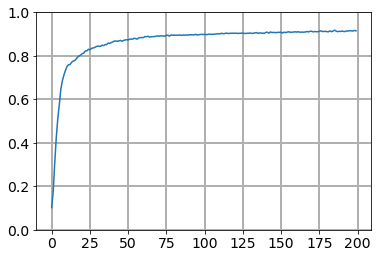

In [54]:
# 학습 곡선 표시(정확도)
plt.plot(history4[:,0], history4[:,2])
plt.ylim(0,1)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.show()

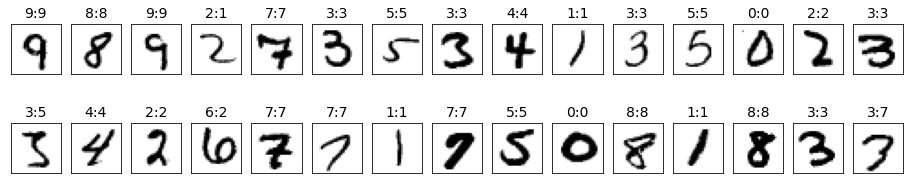

In [55]:
# 데이터 내용 확인
import matplotlib.pyplot as plt
N = 30
np.random.seed(123)
indexes = np.random.choice(y_test.shape[0], N, replace=False)

# x_org의 선택 결과 표시(흑백 반전)
x_selected = x_test[indexes]
y_selected = y_test[indexes]

# 예측값 계산
b1_test = np.insert(ReLU(x_selected @ U), 0, 1, axis=1)
d1_test = np.insert(ReLU(b1_test @ V), 0, 1, axis=1)
yp_test_one = softmax(d1_test @ W)
yp_test = np.argmax(yp_test_one, axis=1)

# 그래프 표시
plt.figure(figsize=(16, 7))
for i in range(N):
    ax = plt.subplot(4, N/2, i + 1)
    plt.imshow(x_selected[i,1:].reshape(28, 28),cmap='gray_r')
    ax.set_title('%d:%d' % (y_selected[i], yp_test[i]),fontsize=14 )
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()